## Task: Predict the percentage of an student score based on the no. of study hours. 
Also find out "What will be predicted score if a student studies for 9.25 hrs/ day?"

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

Importing data using the pandas library
Understanding the structure of the data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [3]:
# Read the given CSV file, and view some sample records

Student_Score = pd.read_csv(r'D:\Nishant\Spark Foundation\Prediction using Supervised ML\student_scores.csv')
Student_Score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking the row and column
Student_Score.shape

(25, 2)

In [5]:
# checking null values
Student_Score.count().isnull()

Hours     False
Scores    False
dtype: bool

In [6]:
Student_Score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2: Data Visualisation and EDA

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

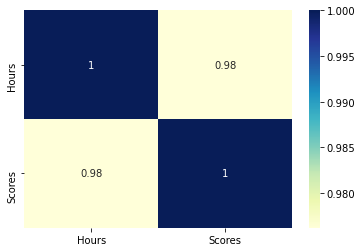

In [8]:
sns.heatmap(Student_Score.corr(), cmap="YlGnBu", annot = True)
plt.show()

<Figure size 1440x720 with 0 Axes>

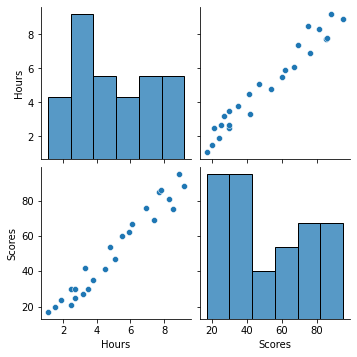

In [9]:
# pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(Student_Score)
plt.show()

<AxesSubplot:ylabel='Scores'>

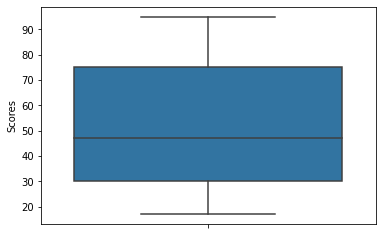

In [13]:
sns.boxplot(y = 'Scores', data = Student_Score)

<AxesSubplot:ylabel='Hours'>

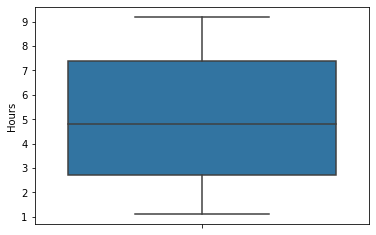

In [14]:
sns.boxplot(y = 'Hours', data = Student_Score)

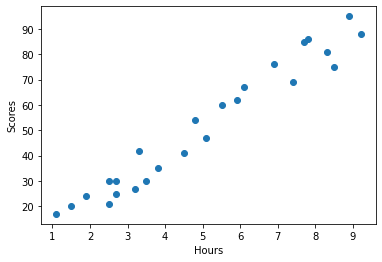

In [26]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(Student_Score.Hours,Student_Score.Scores)
plt.show()

We can conclude that socres are highly co-related with hours

### Step 3: Performing Simple Linear Regression

Equation of linear regression
𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 
𝑦  is the response
𝑐  is the intercept
𝑚1  is the coefficient for the first feature
𝑚𝑛  is the coefficient for the nth feature
In our case:

𝑦=𝑐+𝑚1×𝑇𝑉 
The  𝑚  values are called the model coefficients or model parameters.

#### Generic Steps in model building using statsmodels
We first assign the feature variable, Hours, to the variable X and the response variable, Scores, to the variable y.

In [27]:
X = Student_Score['Hours']
y = Student_Score['Scores']

#### Train-Test Split

We now need to split our variable into training and testing sets. We will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
# Let's now take a look at the train dataset

X_train.head()

6     9.2
12    4.5
4     3.5
24    7.8
0     2.5
Name: Hours, dtype: float64

In [30]:
y_train.head()

6     88
12    41
4     30
24    86
0     21
Name: Scores, dtype: int64

#### Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [32]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [33]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [34]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    1.495142
Hours    9.871714
dtype: float64

In [35]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.15e-11
Time:                        00:47:15   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

1. The coefficient for Hours is 9.8717 , with a very low p value. The coefficient is statistically significant. So the association is not purely by chance.
2. R - squared is 0.957, Meaning that 95.7% of the variance in Scores is explained by Hours. This is a decent R-squared value.
3. F statistic has a very low p value (practically low). Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

#### Scores = 1.4951 + 9.8717×Hours

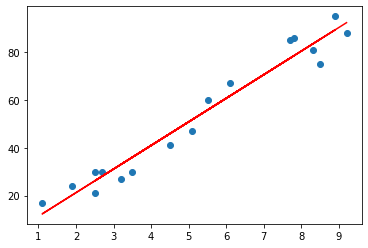

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951 + 9.8717*X_train, 'r')
plt.show()

### Step 4: Residual analysis

To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [37]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

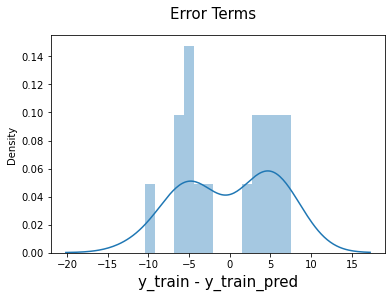

In [38]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

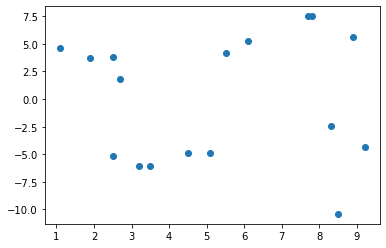

In [41]:
plt.scatter(X_train,res)
plt.show()

Residuals are residuals are distributed uniformly randomly around the zero

### Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [42]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [43]:
y_pred.head()

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Looking at the RMSE

In [45]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5.067387845160841

#### Checking the R-squared on the test set

In [46]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9309458862687439

#### Visualizing the fit on the test set

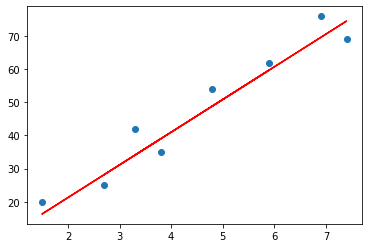

In [47]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.4951 + 9.8717 * X_test, 'r')
plt.show()

## Linear Regression using linear_model in sklearn
Apart from statsmodels, there is another package namely sklearn that can be used to perform linear regression. We will use the linear_model library from sklearn to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [48]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
X_train_lm.shape

(17,)

In [56]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [57]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [58]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lm.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [59]:
print(lm.intercept_)
print(lm.coef_)

1.495142109236383
[9.87171443]


#### The equation we get is the same as what we got before!

#### Scores = 1.4951 + 9.8717×Hours

So we have used statsmodels as well as  linear_model library from sklearn to build the model and both are giving the same fit line equation

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [61]:
# One way, use best fit ;line equation and derive the prdicted value
Hours = 9.25
Scores = 1.4951 + 9.8717*Hours
print(Scores)

92.808325


i.e. If a student studies for 9.25 hrs/ day, he  is likely to score 92.81 marks.

In [64]:
# Second way, use leniar regression lm and get the score
hours = [9.25]
answer = lm.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 92.81
